### Import Libraries

In [1]:
import numpy as np
import pandas as pd

### Loading the Data and Selecting the Features

In [2]:
loan_data_inputs_train = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_targets_test.csv', index_col = 0)

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


### Selecting the Features

In [4]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [5]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [6]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## PD Model Estimation

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
reg = LogisticRegression()

In [9]:
pd.options.display.max_rows = None

In [10]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
reg.intercept_

array([-1.33109313])

In [12]:
reg.coef_

array([[ 1.16007895,  0.90604745,  0.70885804,  0.51905972,  0.33683771,
         0.14489867,  0.09079919,  0.10678402,  0.02966995,  0.05525312,
         0.05661204,  0.05940776,  0.07497691,  0.13244973,  0.09936875,
         0.18112903,  0.2249722 ,  0.22035203,  0.25915986,  0.31662937,
         0.5175072 ,  0.08806866, -0.01075299,  0.30676856,  0.20251069,
         0.21415604,  0.26666872,  0.05443104,  0.07807965,  0.10017903,
         0.12530251,  0.08960109,  0.06084532,  0.1233462 ,  1.07505657,
         0.87435294,  0.77403295,  0.57294178,  0.41066276,  0.16587671,
        -0.06980885,  0.85057263,  0.53835152,  0.28958878,  0.10065203,
         0.05613671,  0.03784193,  0.07957004,  0.1195641 ,  0.12626165,
         0.07428328,  0.03130618,  0.63476472,  0.49137065,  0.28200524,
        -0.01100986, -0.10865446, -0.13433431, -0.14974063, -0.1543543 ,
        -0.11932071, -0.20970765,  0.12264575,  0.17843136, -0.0209366 ,
         0.02532543,  0.21758134,  0.03470565,  0.0

In [13]:
feature_name = inputs_train.columns.values

In [14]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331093
1,grade:A,1.160079
2,grade:B,0.906047
3,grade:C,0.708858
4,grade:D,0.519060
5,grade:E,0.336838
6,grade:F,0.144899
7,home_ownership:OWN,0.090799
8,home_ownership:MORTGAGE,0.106784
9,addr_state:NM_VA,0.029670


### Build a Logistic Regression Model with P-Values

In [15]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [16]:
reg = LogisticRegression_with_p_values()

In [17]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331093
1,grade:A,1.160079
2,grade:B,0.906047
3,grade:C,0.708858
4,grade:D,0.519060
5,grade:E,0.336838
6,grade:F,0.144899
7,home_ownership:OWN,0.090799
8,home_ownership:MORTGAGE,0.106784
9,addr_state:NM_VA,0.029670


In [19]:
p_values = reg.p_values

In [20]:
p_values = np.append(np.nan,np.array(p_values))

In [21]:
summary_table['p_values'] = p_values

In [22]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.331093,NaN
1,grade:A,1.160079,1.709973e-37
2,grade:B,0.906047,1.041414e-49
3,grade:C,0.708858,6.555608e-36
4,grade:D,0.519060,4.998565e-22
5,grade:E,0.336838,2.510449e-12
6,grade:F,0.144899,3.858360e-03
7,home_ownership:OWN,0.090799,6.805044e-06
8,home_ownership:MORTGAGE,0.106784,4.240449e-17
9,addr_state:NM_VA,0.029670,3.545547e-01


In [23]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [24]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [25]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [26]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
feature_name = inputs_train.columns.values

In [28]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.374065
1,grade:A,1.123651
2,grade:B,0.878925
3,grade:C,0.684802
4,grade:D,0.496923
5,grade:E,0.321493
6,grade:F,0.134281
7,home_ownership:OWN,0.093511
8,home_ownership:MORTGAGE,0.106251
9,addr_state:NM_VA,0.036020


In [29]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.374065,NaN
1,grade:A,1.123651,3.235977e-35
2,grade:B,0.878925,4.272713e-47
3,grade:C,0.684802,6.704985e-34
4,grade:D,0.496923,1.346932e-20
5,grade:E,0.321493,1.025246e-11
6,grade:F,0.134281,6.242829e-03
7,home_ownership:OWN,0.093511,3.465254e-06
8,home_ownership:MORTGAGE,0.106251,4.413862e-17
9,addr_state:NM_VA,0.036020,2.608333e-01


In [30]:
import pickle

In [31]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

## PD Model Validation (Test)

### Out-of-sample validation (test)

In [32]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [33]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [34]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [35]:
y_hat_test = reg2.model.predict(inputs_test)

In [36]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [38]:
y_hat_test_proba

array([[0.07569427, 0.92430573],
       [0.15076141, 0.84923859],
       [0.11464994, 0.88535006],
       ...,
       [0.02678649, 0.97321351],
       [0.0402084 , 0.9597916 ],
       [0.04763343, 0.95236657]])

In [39]:
y_hat_test_proba[: ][:, 1]

array([0.92430573, 0.84923859, 0.88535006, ..., 0.97321351, 0.9597916 ,
       0.95236657])

In [40]:
y_hat_test_proba = y_hat_test_proba[: ][:, 1]

In [41]:
y_hat_test_proba

array([0.92430573, 0.84923859, 0.88535006, ..., 0.97321351, 0.9597916 ,
       0.95236657])

In [42]:
loan_data_targets_test_temp = loan_data_targets_test

In [43]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [44]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [45]:
df_actual_predicted_probs.head()

,good_bad,0
0,1,0.924306
1,1,0.849239
2,1,0.885350
3,1,0.940636
4,1,0.968665


In [46]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [47]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [48]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924306
288564,1,0.849239
213591,1,0.885350
263083,1,0.940636
165001,1,0.968665


### Accuracy and Area under the Curve

In [49]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [50]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7374,2816
1,35811,47256


In [51]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384003,0.506729


In [52]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5858005297189487

In [53]:
from sklearn.metrics import roc_curve,roc_auc_score

In [54]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262877, 0.99262877, 0.99069795, ..., 0.48791066, 0.39373231,
        0.37527698]))

In [55]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

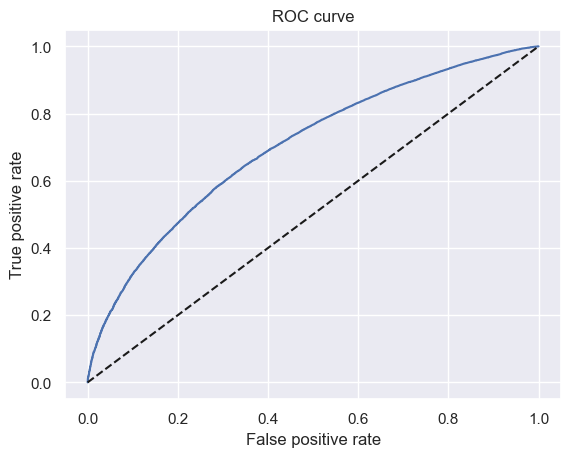

In [57]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--',color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [58]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022080341095952

### Gini and Kolmogorov-Smirnov

In [59]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [60]:
# df_actual_predicted_probs.head()
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991292,1
231463,1,0.991304,1
239228,1,0.991652,1
261086,1,0.992058,1
242624,1,0.992629,1


In [61]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [62]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.375277,0
1,42344,1,0.392097,0
2,39810,0,0.393732,0
3,40518,0,0.448966,0
4,42396,0,0.457733,0


In [63]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [64]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.375277,0,1,1,0
1,42344,1,0.392097,0,2,2,0
2,39810,0,0.393732,0,3,2,1
3,40518,0,0.448966,0,4,2,2
4,42396,0,0.457733,0,5,2,3


In [65]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [66]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.375277,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.392097,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.393732,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448966,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.457733,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

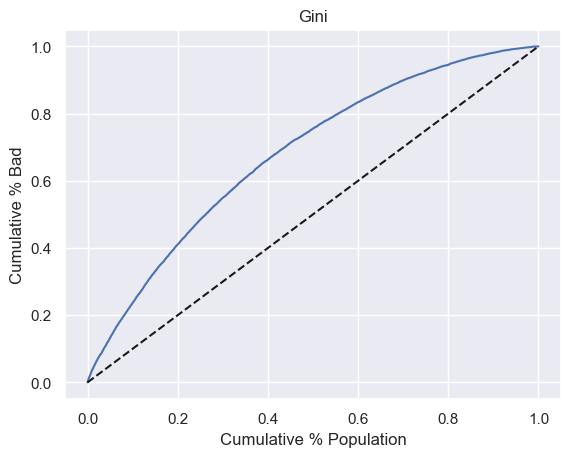

In [67]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [68]:
Gini = AUROC * 2 - 1
Gini

0.4044160682191904

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

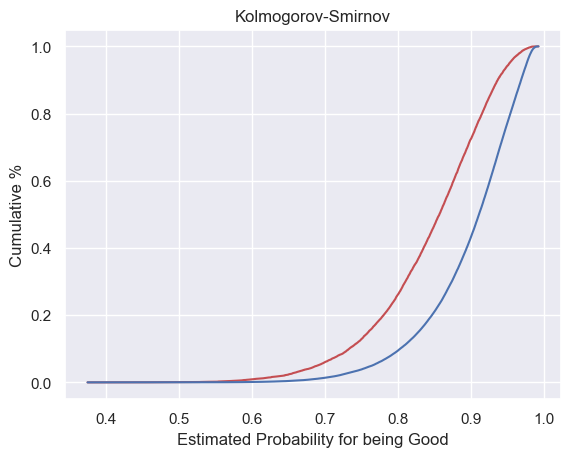

In [69]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [70]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2966746932223847

## Applying the PD Model

### Creating a Scorecard

In [71]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.374065,NaN
1,grade:A,1.123651,3.235977e-35
2,grade:B,0.878925,4.272713e-47
3,grade:C,0.684802,6.704985e-34
4,grade:D,0.496923,1.346932e-20
5,grade:E,0.321493,1.025246e-11
6,grade:F,0.134281,6.242829e-03
7,home_ownership:OWN,0.093511,3.465254e-06
8,home_ownership:MORTGAGE,0.106251,4.413862e-17
9,addr_state:NM_VA,0.036020,2.608333e-01


In [72]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [73]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.374065,NaN
1,1,grade:A,1.123651,3.235977e-35
2,2,grade:B,0.878925,4.272713e-47
3,3,grade:C,0.684802,6.704985e-34
4,4,grade:D,0.496923,1.346932e-20
5,5,grade:E,0.321493,1.025246e-11
6,6,grade:F,0.134281,6.242829e-03
7,7,home_ownership:OWN,0.093511,3.465254e-06
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17
9,9,addr_state:NM_VA,0.036020,2.608333e-01


In [74]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.374065,NaN,Intercept
1,1,grade:A,1.123651,3.235977e-35,grade
2,2,grade:B,0.878925,4.272713e-47,grade
3,3,grade:C,0.684802,6.704985e-34,grade
4,4,grade:D,0.496923,1.346932e-20,grade
5,5,grade:E,0.321493,1.025246e-11,grade
6,6,grade:F,0.134281,6.242829e-03,grade
7,7,home_ownership:OWN,0.093511,3.465254e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17,home_ownership
9,9,addr_state:NM_VA,0.036020,2.608333e-01,addr_state


In [75]:
min_score = 300
max_score = 850

In [76]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.374065
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081516
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071800
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011182
Name: Coefficients, dtype: float64

In [77]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5385637468023783

In [78]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.590264721983825

In [79]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.374065,NaN,Intercept,-106.011244
1,1,grade:A,1.123651,3.235977e-35,grade,86.691386
2,2,grade:B,0.878925,4.272713e-47,grade,67.810368
3,3,grade:C,0.684802,6.704985e-34,grade,52.833488
4,4,grade:D,0.496923,1.346932e-20,grade,38.338382
5,5,grade:E,0.321493,1.025246e-11,grade,24.803709
6,6,grade:F,0.134281,6.242829e-03,grade,10.360008
7,7,home_ownership:OWN,0.093511,3.465254e-06,home_ownership,7.214491
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17,home_ownership,8.197452
9,9,addr_state:NM_VA,0.036020,2.608333e-01,addr_state,2.779004


In [80]:
# Between 300 - 850 (Intercept)
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15572\1728660767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.374065,NaN,Intercept,312.691298
1,1,grade:A,1.123651,3.235977e-35,grade,86.691386
2,2,grade:B,0.878925,4.272713e-47,grade,67.810368
3,3,grade:C,0.684802,6.704985e-34,grade,52.833488
4,4,grade:D,0.496923,1.346932e-20,grade,38.338382
5,5,grade:E,0.321493,1.025246e-11,grade,24.803709
6,6,grade:F,0.134281,6.242829e-03,grade,10.360008
7,7,home_ownership:OWN,0.093511,3.465254e-06,home_ownership,7.214491
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17,home_ownership,8.197452
9,9,addr_state:NM_VA,0.036020,2.608333e-01,addr_state,2.779004


In [81]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.374065,NaN,Intercept,312.691298,313.0
1,1,grade:A,1.123651,3.235977e-35,grade,86.691386,87.0
2,2,grade:B,0.878925,4.272713e-47,grade,67.810368,68.0
3,3,grade:C,0.684802,6.704985e-34,grade,52.833488,53.0
4,4,grade:D,0.496923,1.346932e-20,grade,38.338382,38.0
5,5,grade:E,0.321493,1.025246e-11,grade,24.803709,25.0
6,6,grade:F,0.134281,6.242829e-03,grade,10.360008,10.0
7,7,home_ownership:OWN,0.093511,3.465254e-06,home_ownership,7.214491,7.0
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17,home_ownership,8.197452,8.0
9,9,addr_state:NM_VA,0.036020,2.608333e-01,addr_state,2.779004,3.0


In [82]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [83]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

In [84]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.374065,NaN,Intercept,312.691298,313.0,0.308702
1,1,grade:A,1.123651,3.235977e-35,grade,86.691386,87.0,0.308614
2,2,grade:B,0.878925,4.272713e-47,grade,67.810368,68.0,0.189632
3,3,grade:C,0.684802,6.704985e-34,grade,52.833488,53.0,0.166512
4,4,grade:D,0.496923,1.346932e-20,grade,38.338382,38.0,-0.338382
5,5,grade:E,0.321493,1.025246e-11,grade,24.803709,25.0,0.196291
6,6,grade:F,0.134281,6.242829e-03,grade,10.360008,10.0,-0.360008
7,7,home_ownership:OWN,0.093511,3.465254e-06,home_ownership,7.214491,7.0,-0.214491
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17,home_ownership,8.197452,8.0,-0.197452
9,9,addr_state:NM_VA,0.036020,2.608333e-01,addr_state,2.779004,3.0,0.220996


In [85]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 13
df_scorecard

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15572\766102591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 13


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.374065,NaN,Intercept,312.691298,313.0,0.308702,313.0
1,1,grade:A,1.123651,3.235977e-35,grade,86.691386,87.0,0.308614,87.0
2,2,grade:B,0.878925,4.272713e-47,grade,67.810368,68.0,0.189632,68.0
3,3,grade:C,0.684802,6.704985e-34,grade,52.833488,53.0,0.166512,53.0
4,4,grade:D,0.496923,1.346932e-20,grade,38.338382,38.0,-0.338382,38.0
5,5,grade:E,0.321493,1.025246e-11,grade,24.803709,25.0,0.196291,25.0
6,6,grade:F,0.134281,6.242829e-03,grade,10.360008,10.0,-0.360008,10.0
7,7,home_ownership:OWN,0.093511,3.465254e-06,home_ownership,7.214491,7.0,-0.214491,7.0
8,8,home_ownership:MORTGAGE,0.106251,4.413862e-17,home_ownership,8.197452,8.0,-0.197452,8.0
9,9,addr_state:NM_VA,0.036020,2.608333e-01,addr_state,2.779004,3.0,0.220996,3.0


In [86]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [87]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

### Calculating Credit Score

In [88]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [89]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [90]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Incerpt', 1)

In [91]:
inputs_test_with_ref_cat_w_intercept.head()

,Incerpt,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [92]:
scorecard_scores = df_scorecard['Score - Final']

In [93]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [94]:
scorecard_scores.shape

(102,)

In [95]:
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [96]:
scorecard_scores.shape

(102, 1)

In [97]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [98]:
y_scores.head()

,0
362514,653.0
288564,620.0
213591,683.0
263083,644.0
165001,765.0


### From Credit Score to PD

In [99]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [100]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.954211
288564,0.931446
213591,0.968498
263083,0.948836
165001,0.988888


In [101]:
y_hat_test_proba[0: 5]

array([0.92430573, 0.84923859, 0.88535006, 0.9406362 , 0.96866502])

### Setting Cut-offs

In [102]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [103]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7374,2816
1,35811,47256


In [104]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384003,0.506729


In [105]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5858005297189487

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score

In [107]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262877, 0.99262877, 0.99069795, ..., 0.48791066, 0.39373231,
        0.37527698]))

In [108]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

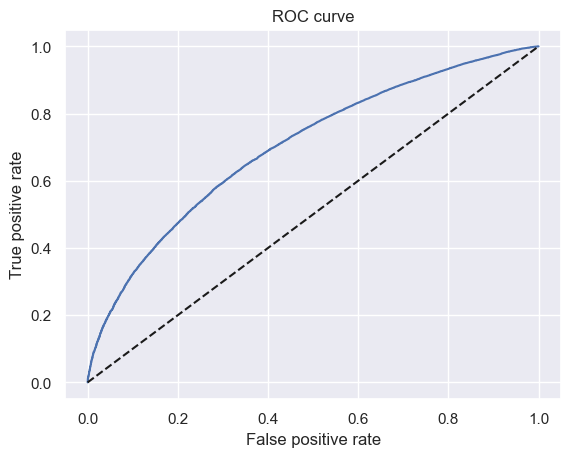

In [110]:
plt.plot(fpr,tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [111]:
thresholds

array([1.99262877, 0.99262877, 0.99069795, ..., 0.48791066, 0.39373231,
       0.37527698])

In [112]:
thresholds.shape

(17238,)

In [113]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [114]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [115]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989762,0.000098,0.000433


In [116]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)

In [117]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [118]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2066.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0


In [119]:
df_cutoffs['Score'][0] = max_score

In [120]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0


In [121]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [122]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [123]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992629,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990698,0.000000,0.000120,779.0,10,93247,0.000107,0.999893
3,0.990653,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989762,0.000098,0.000433,771.0,37,93220,0.000397,0.999603


In [124]:
# default 10% display this 
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903546,0.259470,0.547919,591.0,48158,45099,0.516401,0.483599
5001,0.903546,0.259568,0.547919,591.0,48159,45098,0.516412,0.483588
5002,0.903509,0.259568,0.548160,591.0,48179,45078,0.516626,0.483374
5003,0.903508,0.259666,0.548160,591.0,48180,45077,0.516637,0.483363
5004,0.903483,0.259666,0.548316,591.0,48193,45064,0.516776,0.483224
5005,0.903482,0.259764,0.548316,591.0,48194,45063,0.516787,0.483213
5006,0.903475,0.259764,0.548389,591.0,48200,45057,0.516851,0.483149
5007,0.903473,0.259863,0.548389,591.0,48201,45056,0.516862,0.483138
5008,0.903447,0.259863,0.548653,591.0,48223,45034,0.517098,0.482902
5009,0.903446,0.259961,0.548653,591.0,48224,45033,0.517109,0.482891


In [125]:
# 0.95
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953227,0.049264,0.206737,651.0,17675,75582,0.189530,0.810470
1001,0.953219,0.049264,0.206809,651.0,17681,75576,0.189594,0.810406
1002,0.953219,0.049362,0.206809,651.0,17682,75575,0.189605,0.810395
1003,0.953192,0.049362,0.207026,651.0,17700,75557,0.189798,0.810202
1004,0.953191,0.049460,0.207026,651.0,17701,75556,0.189809,0.810191
1005,0.953188,0.049460,0.207050,651.0,17703,75554,0.189830,0.810170
1006,0.953185,0.049558,0.207050,651.0,17704,75553,0.189841,0.810159
1007,0.953143,0.049558,0.207278,651.0,17723,75534,0.190045,0.809955
1008,0.953139,0.049657,0.207278,651.0,17724,75533,0.190055,0.809945
1009,0.953107,0.049657,0.207459,651.0,17739,75518,0.190216,0.809784


In [126]:
inputs_train_with_ref_cat.to_csv('C:/Users/Lenovo/Downloads/inputs_train_with_ref_cat.csv')

In [127]:
df_scorecard.to_csv('C:/Users/Lenovo/Downloads/df_scorecard.csv')